In [1]:
import scanpy as sc
import surgeon
import numpy as np
sc.settings.set_figure_params(dpi=200, frameon=False)

Using TensorFlow backend.


In [2]:
condition_key = "study"
cell_type_key = 'cell_type'
target_condition = "Drop-seq"

In [3]:
adata = sc.read("./data/pbmc/PBMC_all.h5ad")
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 107248 × 1793 
    obs: 'CBC', 'CellType', 'Experiment', 'Method', 'batch', 'bulk_labels', 'cell_type', 'louvain', 'method', 'n_counts', 'n_genes', 'percent_mito', 'study'
    var: 'ENS-0', 'Name-0', 'gene_ids-1', 'n_counts-2', 'gene_ids-3', 'n_cells-3', 'highly_variable-3', 'means-3', 'dispersions-3', 'dispersions_norm-3'
    uns: 'cell_type_colors', 'neighbors', 'study_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [4]:
adata.obs[cell_type_key].cat.categories

Index(['B cell', 'CD4 T cell', 'CD4+ T Helper2', 'CD4+/CD25 T Reg',
       'CD4+/CD45RA+/CD25- Naive T', 'CD4+/CD45RO+ Memory', 'CD8 T cell',
       'CD8+ Cytotoxic T', 'CD8+/CD45RA+ Naive Cytotoxic', 'CD14 Monocyte',
       'CD16 monocyte', 'CD19+ B', 'CD34+', 'CD56+ NK', 'Cytotoxic T cell',
       'Dendritic cell', 'FCGR3A Monocytes', 'Hematopoietic stem cell',
       'Megakaryocyte', 'Natural killer cell', 'Plasmacytoid dendritic cell'],
      dtype='object')

In [5]:
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('B cell', 'B')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD4 T cell', 'CD4-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD4+ T Helper2', 'CD4-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD4+/CD25 T Reg', 'CD4-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD4+/CD45RA+/CD25- Naive T', 'CD4-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD4+/CD45RO+ Memory', 'CD4-Memory')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD8 T cell', 'CD8-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD8+ Cytotoxic T', 'CD8-T')
# adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD8+/CD45RA+ Naive Cytotoxic', 'CD8-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD14 Monocyte', 'CD14-Mono')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD16 monocyte', 'CD16-Mono')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD19+ B', 'CD19-B')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD34+', 'CD34')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('CD56+ NK', 'CD56-NK')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('Cytotoxic T cell', 'Cytotoxic-T')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('Dendritic cell', 'Dendritic')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('FCGR3A Monocytes', 'F-Mono')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('Hematopoietic stem cell', 'Hematopoietic-Stem')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('Natural killer cell', 'NK')
adata.obs[cell_type_key] = adata.obs[cell_type_key].replace('Plasmacytoid dendritic cell', 'Plasmacytoid-Dendritic')

In [6]:
adata.obs[cell_type_key].value_counts()

CD8-T                     36865
CD4-T                     30520
CD14-Mono                 11377
Cytotoxic-T                6094
B                          5981
CD56-NK                    5859
CD19-B                     3817
Dendritic                  2183
NK                         1897
Megakaryocyte               755
F-Mono                      714
CD16-Mono                   653
CD34                        262
Plasmacytoid-Dendritic      247
Hematopoietic-Stem           24
Name: cell_type, dtype: int64

In [7]:
adata.X.min(), adata.X.max()

(0.0, 4.73389)

In [8]:
adata_count = adata.copy()
adata_count.X = adata.layers['counts'].A
adata_count

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 107248 × 1793 
    obs: 'CBC', 'CellType', 'Experiment', 'Method', 'batch', 'bulk_labels', 'cell_type', 'louvain', 'method', 'n_counts', 'n_genes', 'percent_mito', 'study'
    var: 'ENS-0', 'Name-0', 'gene_ids-1', 'n_counts-2', 'gene_ids-3', 'n_cells-3', 'highly_variable-3', 'means-3', 'dispersions-3', 'dispersions_norm-3'
    uns: 'cell_type_colors', 'neighbors', 'study_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [9]:
del adata_count.layers['counts']
del adata.layers['counts']

In [10]:
adata_count.X.min(), adata_count.X.max()

(0.0, 14986.0)

In [11]:
adata.write_h5ad("./data/pbmc/pbmc_normalized.h5ad")

... storing 'cell_type' as categorical


In [12]:
adata_count.write_h5ad("./data/pbmc/pbmc_count.h5ad")

... storing 'cell_type' as categorical


In [9]:
sc.set_figure_params(dpi=200)

In [10]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

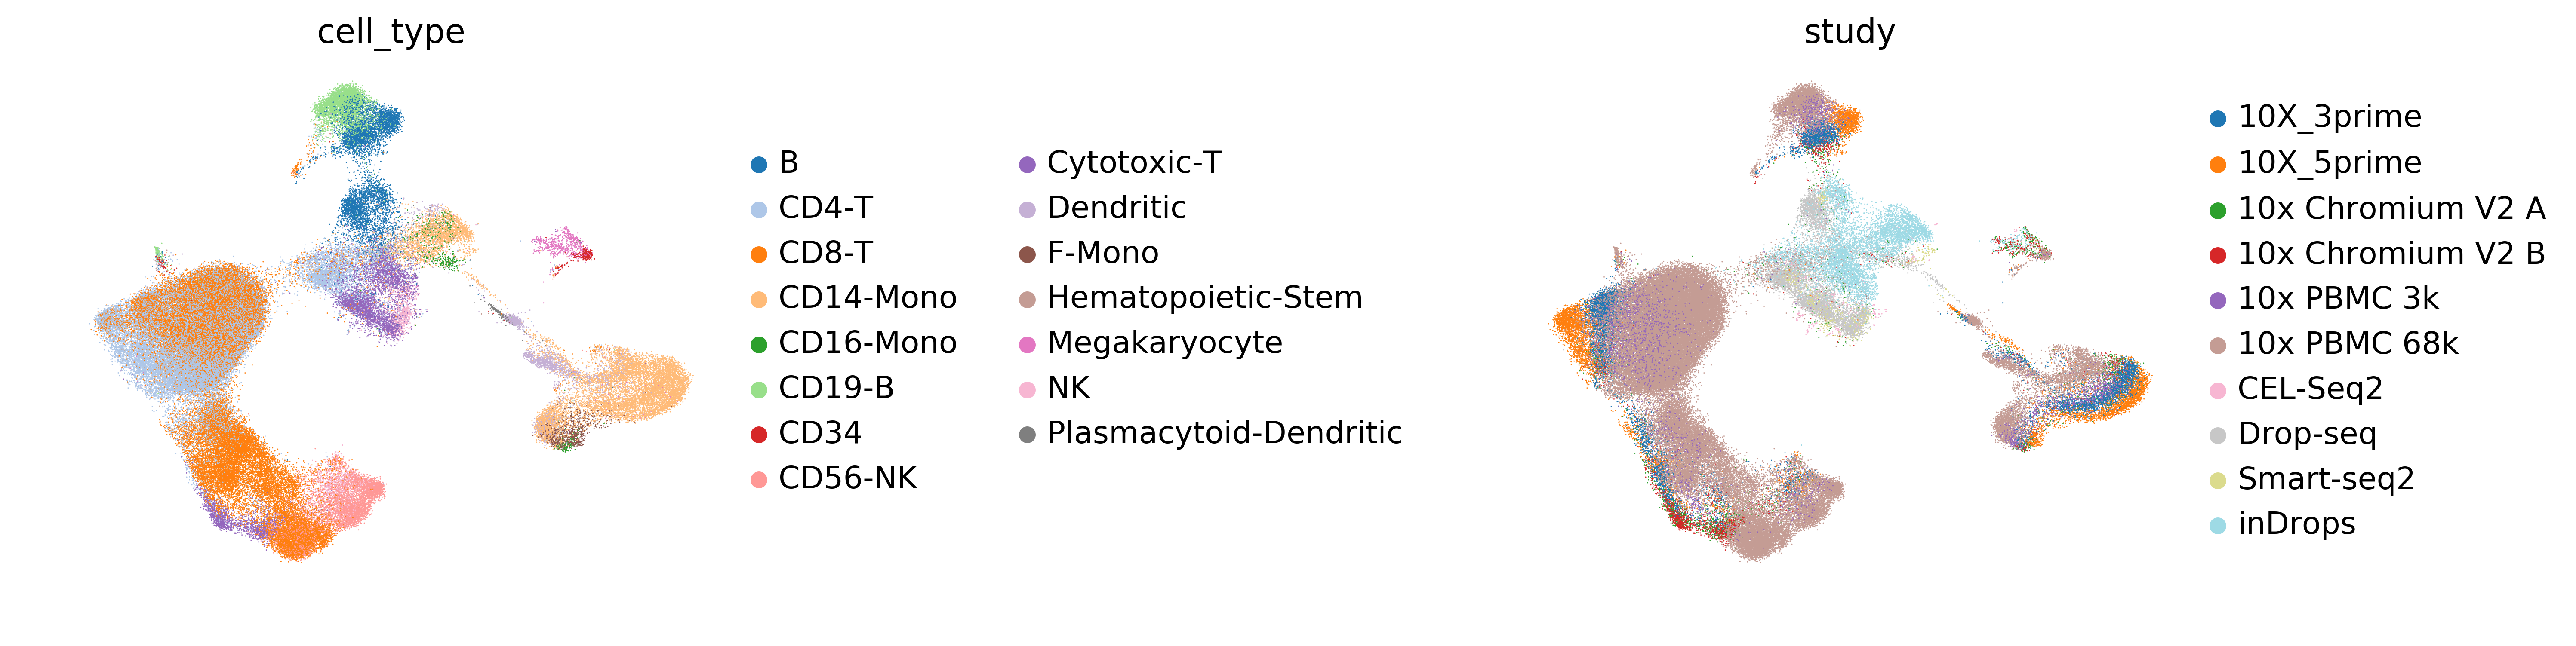

In [13]:
sc.pl.umap(adata, color=[cell_type_key, condition_key], wspace=1.0, frameon=False)